In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import pandas as pd

In [3]:
pwd

'/Users/user/Documents/D/Schools 2/Computer Vision/R09945020_HW4_ver1'

In [2]:
cd R09945020_HW4_ver1/

[Errno 2] No such file or directory: 'R09945020_HW4_ver1/'
/Users/user/Documents/D/Schools 2/Computer Vision/R09945020_HW4_ver1


In [4]:
default_kernel=np.zeros((5,5), dtype=np.int)

### Define the octogonal 3-5-5-5-3 kernel

In [5]:
octogona_kernel=default_kernel
for i in [0,4]:
    for j in range(1,4):
        octogona_kernel[i,j]=1
for i in [1,2,3]:
    for  j in range(5):
        octogona_kernel[i,j]=1

In [6]:
octogona_kernel

array([[0, 1, 1, 1, 0],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [1, 1, 1, 1, 1],
       [0, 1, 1, 1, 0]])

### Import the image file

In [7]:
lena=cv2.imread('lena.bmp')

In [8]:
img=np.array(lena)

### Convert the image into binary

In [9]:
bi_img=np.zeros((img.shape[0],img.shape[1],img.shape[2]), dtype=np.int)
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for k in range(img.shape[2]):
            if(img[i,j,k]>=128):
                bi_img[i,j,k]=1
            else:
                bi_img[i,j,k]=0
                

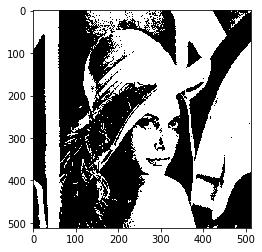

In [21]:
plt.imshow(bi_img*255)

In [77]:
cv2.imwrite('original_binary.bmp',bi_img*255)

True

### Dilation function

In [11]:
def dilation(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.zeros((L_len,P_len), dtype=np.int)
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    for l in range(L_len):
        for p in range(P_len):
            if(image[l,p,0]==1):
                if(l-ker_l<0):    
                    l_start=0
                else:
                    l_start=l-ker_l
                    
                if(l+ker_l>L_len-1):    
                    l_end=L_len-1
                else:
                    l_end=l+ker_l
                    
                if(p-ker_p<0):    
                    p_start=0
                else:
                    p_start=p-ker_p
                    
                if(p+ker_p>P_len-1):    
                    p_end=P_len-1
                else:
                    p_end=p+ker_p
                
                for i in range(l_start,l_end+1):
                    for j in range(p_start,p_end+1):
                        new_img[i,j]= image[i,j,0] or kernel[i-l+ker_l,j-p+ker_p] or new_img[i,j]
    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

### Erosion function

In [12]:
def erosion(image,kernel):
    L_len=image.shape[0]
    P_len=image.shape[1]
    new_img=np.copy(image[:,:,0])
    ker_l=int((kernel.shape[0]-1)/2)
    ker_p=int((kernel.shape[1]-1)/2)
    
    # for the marginal pixels, they should be 0
    for l in [0,1,L_len-2,L_len-1]:
        for p in range(P_len):
            new_img[l,p]=0
    for p in [0,1,P_len-2,P_len-1]:
        for l in range(L_len):
            new_img[l,p]=0
    
    for l in range(ker_l,L_len-ker_l):
        for p in range(ker_p,P_len-ker_p):
            if(image[l,p,0]==1):
                l_start=l-ker_l
                l_end=l+ker_l
                p_start=p-ker_p
                p_end=p+ker_p
                val=1
                
                for i in range(l_start,l_end+1):
                    for j in range(p_start,p_end+1):
                        if(kernel[i-l+ker_l,j-p+ker_p]==1 and image[i,j,0]==0):
                            val=0
                            break
                    if(val==0):
                        break
                
                if(val==0):
                    new_img[l,p]=0
    re_img=np.stack((new_img, new_img, new_img), axis = -1) 
                        
    return re_img

In [72]:
dilation_img=dilation(bi_img,octogona_kernel)

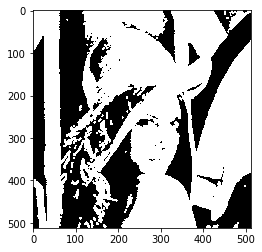

In [73]:
plt.imshow(dilation_img*255)

In [74]:
erosion_img=erosion(bi_img,octogona_kernel)

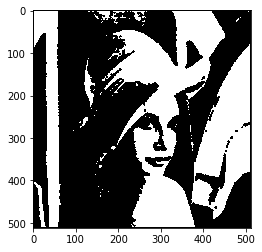

In [75]:
plt.imshow(erosion_img*255)

### Export the images

In [78]:
cv2.imwrite('dilation.bmp', dilation_img*255)

True

In [79]:
cv2.imwrite('erosion.bmp', erosion_img*255)

True

### Opening

$$
(B \ominus K) \oplus K 
$$

In [13]:
erosion_img=erosion(bi_img,octogona_kernel)
opening_img=dilation(erosion_img,octogona_kernel)

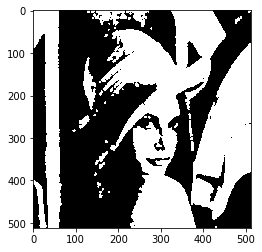

In [14]:
plt.imshow(opening_img*255)

In [31]:
cv2.imwrite('opening.bmp', opening_img*255)

True

### Closing

$$
(B \oplus K) \ominus K 
$$

In [15]:
dilation_img=dilation(bi_img,octogona_kernel)
closing_img=erosion(dilation_img,octogona_kernel)

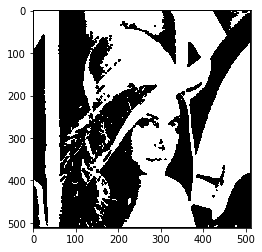

In [16]:
plt.imshow(closing_img*255)

In [30]:
cv2.imwrite('closing.bmp', closing_img*255)

True

### Hit-and-miss transform

In [17]:
default_kernel_2=np.zeros((2,2), dtype=np.int)
HM_kernel=default_kernel_2
for i in [(0,0),(0,1),(1,1)]:
    HM_kernel[i]=1

In [18]:
HM_kernel

array([[1, 1],
       [0, 1]])

In [26]:
def HitAndMiss(image,Kernel,J,K):
    L_len=image.shape[0]
    P_len=image.shape[1]
    h_kernel=Kernel.shape[0]
    w_kernel=Kernel.shape[1]
    #J=[0,1] K=[1,0]
    out_l_J=J[1]-0 #left side of J =1
    out_r_J=w_kernel-1-J[1] #right side of J =0
    out_t_J=J[0]-0 #top side of J=0
    out_d_J=h_kernel-1-J[0] #down side of J=1
    
    out_l_K=K[1]-0 #left side of K=0
    out_r_K=w_kernel-1-K[1] #right side of K=1
    out_t_K=K[0]-0 #top side of K=1
    out_d_K=h_kernel-1-K[0] #down side of K=0
    
    reverse_img=image*(-1)+1
    J_img=np.zeros((L_len,P_len), dtype=np.int)
    K_img=np.zeros((L_len,P_len), dtype=np.int)
    hit_miss=np.zeros((L_len,P_len), dtype=np.int)
    
    #for kernel J
    for l in range(out_t_J,L_len-out_d_J):
        for p in range(out_l_J,P_len-out_r_J):
            flag=1
            for i in range(h_kernel):
                for j in range(w_kernel):
                    if(image[l-J[0]+i][p-J[1]+j][0]==0 and Kernel[i][j]==1):
                        flag=0
                        break
                if(flag==0):
                    break
            if(flag==1):
                J_img[l][p]=1
            
    #jor kernel K
    for l in range(out_t_K,L_len-out_d_K):
        for p in range(out_l_K,P_len-out_r_K):
            flag=1
            for i in range(h_kernel):
                for j in range(w_kernel):
                    if(reverse_img[l-K[0]+i][p-K[1]+j][0]==0 and Kernel[i][j]==1):
                        flag=0
                        break
                if(flag==0):
                    break
            if(flag==1):
                K_img[l][p]=1
                
    #for intersection
    for l in range(L_len):
        for p in range(P_len):
            if(K_img[l][p]==1 and J_img[l][p]==1):
                hit_miss[l][p]=1
                
    re_img=np.stack((hit_miss, hit_miss, hit_miss), axis = -1) 
    
    return re_img

In [27]:
hit_and_miss_img=HitAndMiss(bi_img,HM_kernel,(0,1),(1,0))

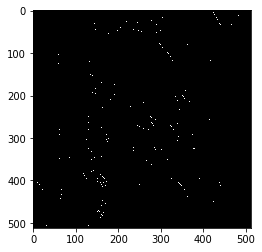

In [28]:
plt.imshow(hit_and_miss_img*255)

In [29]:
cv2.imwrite('hit_and_miss.bmp', hit_and_miss_img*255)

True